In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
#Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Usar "Shift+Enter" para procesar la información de la celda

In [2]:
#Delimitamos que las columnas están separadas por una coma en el archivo de textos.
df0 = pd.read_csv('vid18_180219.dat', sep=',')
#Imprimimos el Data frame.head para ver la distribución de los 5 primeros datos.
sns.set(rc={'figure.figsize':(12,8.27)})
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
#Creamos un nuevo DataFrame donde solo nos interesen las columnas de TIMESTAMP (fecha) y AitTC_Avg (Temperatura del aire en °C)
df1 = pd.DataFrame({"DATE" : df0.TIMESTAMP, "AIRTC" : df0.AirTC_Avg})
#Imprimimos los primeros 5 datos del nuevo DataFrame.
df1.head()

,DATE,AIRTC
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [4]:
#Para comprobar que sean variables de fecha y número:
df1.dtypes

DATE      object
AIRTC    float64
dtype: object

In [5]:
# Convertir la columna DATE a una variable tiempo.
# Se crea una nueva columna "FECHA" al final con formato de tiempo.
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['DATE'] , 1), dayfirst=True)
df1 = df1.drop(['DATE'], 1)

#Imprimos el DataFrame 
df1.head()


,AIRTC,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [6]:
#Verificamos que ahora la columna fecha sea una variable de tiempo:
df1.dtypes

AIRTC           float64
FECHA    datetime64[ns]
dtype: object

In [7]:
#Creamos una columna de meses y de días en el data frame:
df1['MES'] = df1['FECHA'].dt.month
df1['DÍA'] = df1['FECHA'].dt.day
df1['AÑO'] = df1['FECHA'].dt.year

#Imprimimos el Data Frame para ver los primeros 5 renglones con las columnas de los meses y de los días:
df1.head()

,AIRTC,FECHA,MES,DÍA,AÑO
0,23.50,2018-05-11 20:10:00,5,11,2018
1,22.96,2018-05-11 20:20:00,5,11,2018
2,22.73,2018-05-11 20:30:00,5,11,2018
3,22.40,2018-05-11 20:40:00,5,11,2018
4,22.46,2018-05-11 20:50:00,5,11,2018


In [8]:
#Los Datos se van a empezar a tomar desde el 1° de Noviembre de 2018
df1.iloc[[24935]]

,AIRTC,FECHA,MES,DÍA,AÑO
24935,9.13,2018-11-01,11,1,2018


In [9]:
#Creamos otro Data Frame para los días a partir del 1° de Noviembre.
df2 = pd.DataFrame({"FECHA" : df1[df1.index>=24935].FECHA, "AIRTC" : df1[df1.index>=24935].AIRTC})
#Mostramos el data frame.
df2.head()


,FECHA,AIRTC
24935,2018-11-01 00:00:00,9.13
24936,2018-11-01 00:10:00,8.89
24937,2018-11-01 00:20:00,8.66
24938,2018-11-01 00:30:00,8.52
24939,2018-11-01 00:40:00,8.47


In [10]:
#Para que el índice comience en el 0:
df3 = pd.DataFrame({"FECHA" : df2.FECHA, "AIRTC" : df2.AIRTC})
df3.index = np.arange(0, len(df2))
df3.head()

,FECHA,AIRTC
0,2018-11-01 00:00:00,9.13
1,2018-11-01 00:10:00,8.89
2,2018-11-01 00:20:00,8.66
3,2018-11-01 00:30:00,8.52
4,2018-11-01 00:40:00,8.47


In [11]:
#Creamos las columnas de días, meses y años:
df3['MES'] = df3['FECHA'].dt.month
df3['DÍA'] = df3['FECHA'].dt.day
df3['AÑO'] = df3['FECHA'].dt.year
df3['HORA'] = df3['FECHA'].dt.hour
df3['MINUTO'] = df3['FECHA'].dt.minute

#Imprimimos los primeros 5 renglones:
df3.head()

,FECHA,AIRTC,MES,DÍA,AÑO,HORA,MINUTO
0,2018-11-01 00:00:00,9.13,11,1,2018,0,0
1,2018-11-01 00:10:00,8.89,11,1,2018,0,10
2,2018-11-01 00:20:00,8.66,11,1,2018,0,20
3,2018-11-01 00:30:00,8.52,11,1,2018,0,30
4,2018-11-01 00:40:00,8.47,11,1,2018,0,40


In [12]:
#Calculo el PROMedio de la Temperatura por Horas
df3['PROMTH'] = df3.groupby(['AÑO','MES','DÍA','HORA'])['AIRTC'].transform('mean')
df3.head()

,FECHA,AIRTC,MES,DÍA,AÑO,HORA,MINUTO,PROMTH
0,2018-11-01 00:00:00,9.13,11,1,2018,0,0,8.708333
1,2018-11-01 00:10:00,8.89,11,1,2018,0,10,8.708333
2,2018-11-01 00:20:00,8.66,11,1,2018,0,20,8.708333
3,2018-11-01 00:30:00,8.52,11,1,2018,0,30,8.708333
4,2018-11-01 00:40:00,8.47,11,1,2018,0,40,8.708333


In [13]:
#Creamos otro Data Frames en base a los promedios de temperatura por hora.
df4 = pd.DataFrame({"FECHA" : df3[df3.MINUTO==0].FECHA, "PROMTH" : df3[df3.MINUTO==0].PROMTH, "HORA" : df3[df3.MINUTO==0].HORA, "DÍA" : df3[df3.MINUTO==0].DÍA, "MES" : df3[df3.MINUTO==0].MES, "AÑO" : df3[df3.MINUTO==0].AÑO})
df4.index = np.arange(0, len(df3)/6)
df4.head()

,FECHA,PROMTH,HORA,DÍA,MES,AÑO
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018


In [14]:
#Procedemos a calcular la unidad de frío por cada hora con las condiciones dadas:
#Menor que 1.5 = 0
#De 1.5 a menor de 2.5 = 0.5
#De 2.5 a menor de 9.2 = 1
#De 9.2 a menor de 12.5 = 0.5
#De 12.5 a menor de 16 = 0
#De 16 a menor de 18 = -0.5
#De 18 a mayor = -1
#ufd son las unidades de frío por día.

n = 0
ufd = []
for i in range (0,len(df4.PROMTH)):
    if(df4["PROMTH"][i]<=1.5):
        n = 0
    elif(df4["PROMTH"][i]>1.5 and df4["PROMTH"][i]<=2.5):
        n = 0.5
    elif(df4["PROMTH"][i]>2.5 and df4["PROMTH"][i]<=9.2):
        n = 1
    elif(df4["PROMTH"][i]>9.2 and df4["PROMTH"][i]<=12.5):
        n = 0.5
    elif(df4["PROMTH"][i]>12.5 and df4["PROMTH"][i]<=16):
        n = 0
    elif(df4["PROMTH"][i]>16 and df4["PROMTH"][i]<=18):
        n = -0.5
    elif(df4["PROMTH"][i]>18):
        n = -1
        
    ufd.append(n)
    n = 0
    
#UFH es la columna de Unidades de Frío por Hora.
df4['UFH'] = ufd
df4.head()

,FECHA,PROMTH,HORA,DÍA,MES,AÑO,UFH
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1.0
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1.0
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1.0
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1.0
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1.0


In [15]:
#Se calcularán las Horas de Frío Efectivas
#HF es el número de horas frío por día (0 < T <= 10ºC)
#HFE es el número de horas frío efectivas por día ( HFE= HF - número de horas con T >= 25ºC)

n = 0
HF = []
for i in range (0,len(df4.PROMTH)):
    if(df4["PROMTH"][i]>0 and df4["PROMTH"][i]<=10):
        n = 1
    else:
        n = 0
    HF.append(n)
    n = 0
    
#UFH es la columna de Unidades de Frío por Hora.
df4['HF'] = HF
df4.head()


,FECHA,PROMTH,HORA,DÍA,MES,AÑO,UFH,HF
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1.0,1
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1.0,1
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1.0,1
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1.0,1
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1.0,1


In [16]:
#Hacemos una columna de Horas Calientes donde la temperatura sea >=25.

n = 0
HC = []
for i in range (0,len(df4.PROMTH)):
    if(df4["PROMTH"][i]>=25):
        n = 1
    else:
        n = 0
    HC.append(n)
    n = 0
    
#UFH es la columna de Unidades de Frío por Hora.
df4['HC'] = HC
df4.head()

,FECHA,PROMTH,HORA,DÍA,MES,AÑO,UFH,HF,HC
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1.0,1,0
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1.0,1,0
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1.0,1,0
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1.0,1,0
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1.0,1,0


In [17]:
#Calculamos las horas de frío por día y las horas calientes por día con un groupby.

df4["HFDAY"] = df4.groupby(['AÑO','MES','DÍA'])['HF'].transform('sum')
df4["HCDAY"] = df4.groupby(['AÑO','MES','DÍA'])['HC'].transform('sum')
df4.head()

,FECHA,PROMTH,HORA,DÍA,MES,AÑO,UFH,HF,HC,HFDAY,HCDAY
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1.0,1,0,8,6
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1.0,1,0,8,6
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1.0,1,0,8,6
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1.0,1,0,8,6
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1.0,1,0,8,6


In [18]:
#UF24 es la columna con las Unidades de Frío por Día.
#Usamos un groupby para calcular la sumatoria de unidades de frío por día.

df4["UF24"] = df4.groupby(['AÑO','MES','DÍA'])['UFH'].transform('sum')

df4.head()


,FECHA,PROMTH,HORA,DÍA,MES,AÑO,UFH,HF,HC,HFDAY,HCDAY,UF24
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1.0,1,0,8,6,-0.5
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1.0,1,0,8,6,-0.5
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1.0,1,0,8,6,-0.5
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1.0,1,0,8,6,-0.5
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1.0,1,0,8,6,-0.5


In [19]:
#Obtenemos la tyemperatura máxima y mínima de cada día en base a la temperatura de cada hora:

df4['TMAX'] = df4.groupby(['AÑO','MES','DÍA'])['PROMTH'].transform('max')
df4['TMIN'] = df4.groupby(['AÑO','MES','DÍA'])['PROMTH'].transform('min')

df4.head()

,FECHA,PROMTH,HORA,DÍA,MES,AÑO,UFH,HF,HC,HFDAY,HCDAY,UF24,TMAX,TMIN
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1.0,1,0,8,6,-0.5,28.621667,6.806833
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1.0,1,0,8,6,-0.5,28.621667,6.806833
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1.0,1,0,8,6,-0.5,28.621667,6.806833
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1.0,1,0,8,6,-0.5,28.621667,6.806833
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1.0,1,0,8,6,-0.5,28.621667,6.806833


In [20]:
#Creamos un Data frame con los datos de las temperaturas máximas y mínimas diarias con sus respectivas unidades de frío.
df5 = pd.DataFrame({"FECHA" : df4[df4.HORA==0].FECHA, "AÑO" : df4[df4.HORA==0].AÑO,"MES" : df4[df4.HORA==0].MES, "DÍA" : df4[df4.HORA==0].DÍA, "UF24" : df4[df4.HORA==0].UF24, "TMAX" : df4[df4.HORA==0].TMAX, "TMIN" : df4[df4.HORA==0].TMIN, "HFDAY" : df4[df4.HORA==0].HFDAY, "HCDAY" : df4[df4.HORA==0].HCDAY})
df5.index = np.arange(0,len(df5))
df5.head()

,FECHA,AÑO,MES,DÍA,UF24,TMAX,TMIN,HFDAY,HCDAY
0,2018-11-01,2018,11,1,-0.5,28.621667,6.806833,8,6
1,2018-11-02,2018,11,2,-9.0,30.960000,10.248333,0,8
2,2018-11-03,2018,11,3,-9.0,29.998333,10.473333,0,8
3,2018-11-04,2018,11,4,-11.5,31.243333,11.670000,0,8
4,2018-11-05,2018,11,5,-8.0,31.093333,11.435000,0,8


In [21]:
#Hacemos la resta de Horas de frío menos las de horas calientes:
#Horas de Frío Efectivas:

df5["HFE"] = df5.HFDAY - df5.HCDAY
df5.head()

,FECHA,AÑO,MES,DÍA,UF24,TMAX,TMIN,HFDAY,HCDAY,HFE
0,2018-11-01,2018,11,1,-0.5,28.621667,6.806833,8,6,2
1,2018-11-02,2018,11,2,-9.0,30.960000,10.248333,0,8,-8
2,2018-11-03,2018,11,3,-9.0,29.998333,10.473333,0,8,-8
3,2018-11-04,2018,11,4,-11.5,31.243333,11.670000,0,8,-8
4,2018-11-05,2018,11,5,-8.0,31.093333,11.435000,0,8,-8


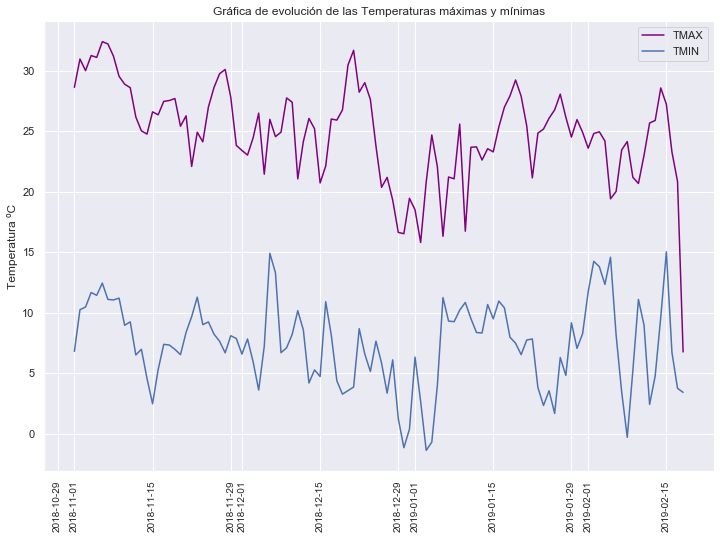

In [46]:
#Gráfica de la evolución de las temperaturas máximas y mínimas.
plt.plot_date(x=df5.FECHA, y=df5.TMAX, fmt="purple")
plt.plot_date(x=df5.FECHA, y=df5.TMIN, fmt="b-")
plt.xticks(size='small', rotation=90)
plt.legend(loc='best')
plt.title("Gráfica de evolución de las Temperaturas máximas y mínimas")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.savefig('EvolTemp',plt=2000)
plt.show()

In [39]:
#Unidades de Frío acumuladas:
df5['UFACUM'] = df5.UF24.cumsum()
#Horas de Frío Efectivas Acumuladas:
df5['HFEACUM'] = df5.HFE.cumsum()
#Mostramos el Data Frame:
df5.head()

,FECHA,AÑO,MES,DÍA,UF24,TMAX,TMIN,HFDAY,HCDAY,HFE,UFACUM,HFEACUM
0,2018-11-01,2018,11,1,-0.5,28.621667,6.806833,8,6,2,-0.5,2
1,2018-11-02,2018,11,2,-9.0,30.960000,10.248333,0,8,-8,-9.5,-6
2,2018-11-03,2018,11,3,-9.0,29.998333,10.473333,0,8,-8,-18.5,-14
3,2018-11-04,2018,11,4,-11.5,31.243333,11.670000,0,8,-8,-30.0,-22
4,2018-11-05,2018,11,5,-8.0,31.093333,11.435000,0,8,-8,-38.0,-30


In [48]:
#Mostramos los últimos 5 renglones:
df5.tail()

,FECHA,AÑO,MES,DÍA,UF24,TMAX,TMIN,HFDAY,HCDAY,HFE,UFACUM,HFEACUM
105,2019-02-14,2019,2,14,-11.0,28.570000,9.643333,1,7,-6,-257.0,340
106,2019-02-15,2019,2,15,-20.5,27.220000,15.031667,0,5,-5,-277.5,335
107,2019-02-16,2019,2,16,-4.5,23.276667,6.718833,4,0,4,-282.0,339
108,2019-02-17,2019,2,17,2.5,20.845000,3.756833,10,0,10,-279.5,349
109,2019-02-18,2019,2,18,8.0,6.758167,3.418500,8,0,8,-271.5,357


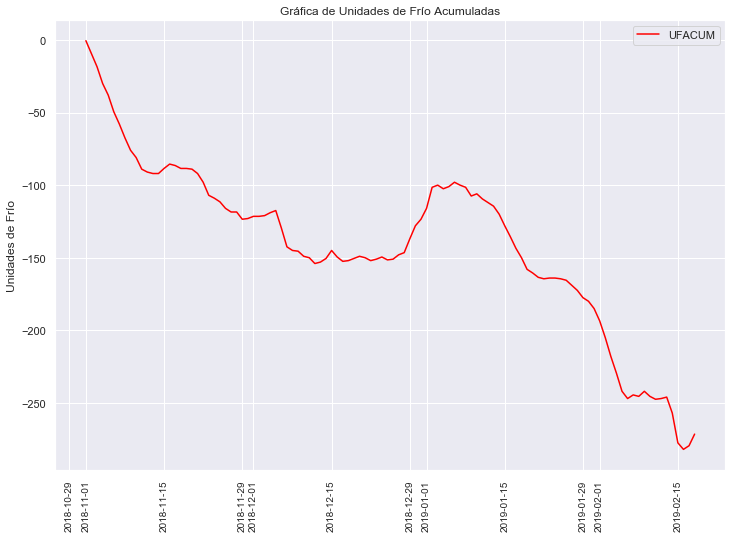

In [40]:
#Graficamos las Unidades de Frío acumuladas:
plt.plot_date(x=df5.FECHA, y=df5.UFACUM, fmt="red")
plt.xticks(size='small', rotation=90)
plt.legend(loc='best')
plt.title("Gráfica de Unidades de Frío Acumuladas")
plt.ylabel("Unidades de Frío")
plt.grid(True)
plt.savefig('UF24',plt=2000)
plt.show()

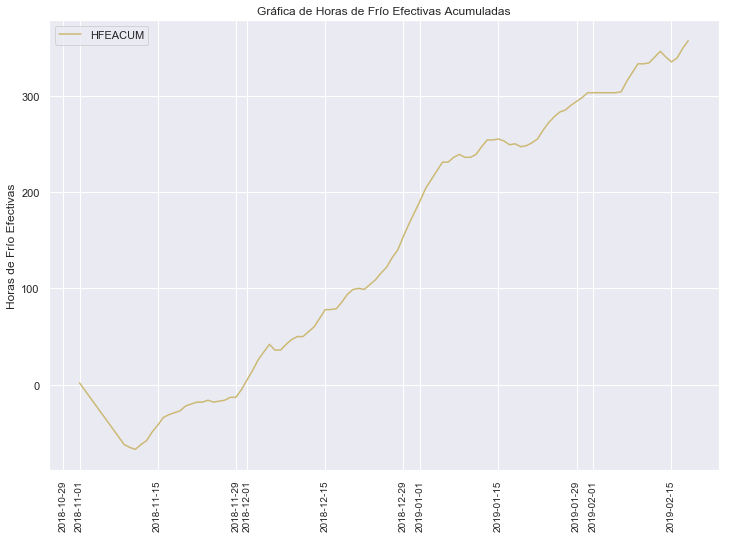

In [42]:
#Graficamos las Horas de Frío Efectivas Acumuladas contra el tiempo.
plt.plot_date(x=df5.FECHA, y=df5.HFEACUM, fmt="y")
plt.xticks(size='small', rotation=90)
plt.legend(loc='best')
plt.title("Gráfica de Horas de Frío Efectivas Acumuladas")
plt.ylabel("Horas de Frío Efectivas")
plt.grid(True)
plt.savefig('HFE',plt=2000)
plt.show()


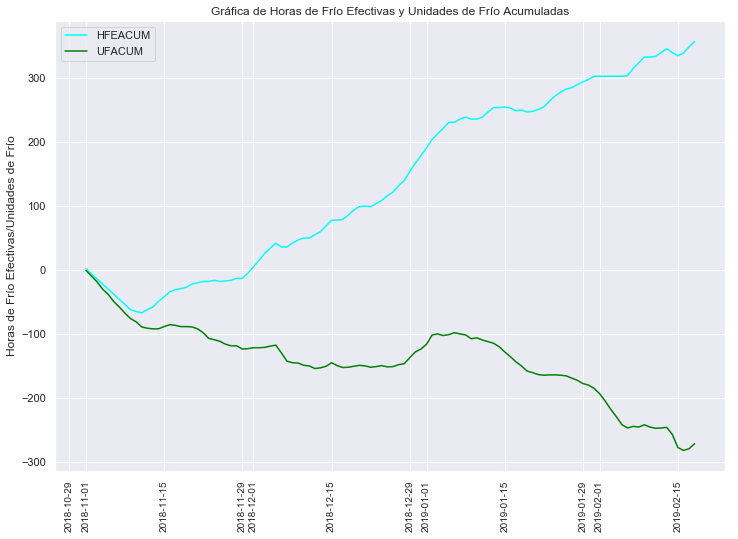

In [43]:
#Graficamos ambos índices de frío acumulados.
plt.plot_date(x=df5.FECHA, y=df5.HFEACUM, fmt="cyan")
plt.plot_date(x=df5.FECHA, y=df5.UFACUM, fmt="green")
plt.xticks(size='small', rotation=90)
plt.legend(loc='best')
plt.title("Gráfica de Horas de Frío Efectivas y Unidades de Frío Acumuladas")
plt.ylabel("Horas de Frío Efectivas/Unidades de Frío")
plt.grid(True)
plt.savefig('Ambos',plt=2000)
plt.show()


Como se puede observar, ambos índices graficados se ven distintos, pero significan lo mismo: que la temperatura ha ido aumentando, sinembargo la temperatura en los meses de noviembre a febrero la temperatura casi no ha subido de los 25° C (por ser invierno).